In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\Capstone project\Originaldata.xlsx'
df = pd.read_excel(file_path)

In [87]:
df.head()


,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes
1,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,Substantially Equal,No,No
2,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No
3,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,For medically necessary only,Substantially Equal,No,No
4,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No


In [103]:
df.info()  # Check for missing values and data types
df.describe()  # Get a summary of numerical data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   BusinessYear         1048575 non-null  int64         
 1   StateCode            1048575 non-null  object        
 2   IssuerId             1048575 non-null  int64         
 3   SourceName           1048575 non-null  object        
 4   ImportDate           1048575 non-null  datetime64[ns]
 5   StandardComponentId  1048575 non-null  object        
 6   PlanId               1048575 non-null  object        
 7   BenefitName          1048575 non-null  object        
 8   CopayInnTier1        759241 non-null   float64       
 9   CopayInnTier2        190024 non-null   float64       
 10  CopayOutofNet        796249 non-null   float64       
 11  CoinsInnTier1        808186 non-null   object        
 12  CoinsInnTier2        191478 non-null   object        
 1

,BusinessYear,IssuerId,CopayInnTier1,CopayInnTier2,CopayOutofNet,LimitQty,Cluster
count,1048575.0,1.048575e+06,759241.000000,190024.000000,796249.000000,146943.000000,1.048575e+06
mean,2024.0,4.791590e+04,19.385617,3.872569,3.059380,74.277523,2.885821e-03
std,0.0,2.593389e+04,137.432187,43.182392,60.977591,1144.296272,7.243223e-02
min,2024.0,1.132400e+04,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2024.0,3.025200e+04,0.000000,0.000000,0.000000,1.000000,0.000000e+00
50%,2024.0,3.816600e+04,0.000000,0.000000,0.000000,30.000000,0.000000e+00
75%,2024.0,6.944300e+04,0.000000,0.000000,0.000000,35.000000,0.000000e+00
max,2024.0,9.979100e+04,3700.000000,1500.000000,2500.000000,75000.000000,2.000000e+00


In [105]:
##Data Preprocessing and Feature Engineering
# Handle missing values
df.fillna(0, inplace=True)  # Example of filling missing values

# Feature engineering: create new features (if applicable)
df['InOut_CopayRatio'] = df['CopayInnTier1'] / (df['CopayOutofNet'] + 1)  # Add 1 to avoid division by zero


In [88]:
#clean the database

# Clean the CopayInnTier1, CopayInnTier2, and CopayOutofNet fields by converting them to numerical values
def clean_copay_column(column):
    return pd.to_numeric(df[column].replace(['Not Applicable', 'No Charge', '$0.00'], 0).replace('[\$,]', '', regex=True), errors='coerce')

df['CopayInnTier1'] = clean_copay_column('CopayInnTier1')
df['CopayInnTier2'] = clean_copay_column('CopayInnTier2')
df['CopayOutofNet'] = clean_copay_column('CopayOutofNet')

df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),0.0,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes
1,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,0.0,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,Substantially Equal,No,No
2,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,0.0,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No
3,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Orthodontia - Child,0.0,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,For medically necessary only,Substantially Equal,No,No
4,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,0.0,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No


Summary Statistics for Copayments by Tier:
       CopayInnTier1  CopayInnTier2  CopayOutofNet
count  759241.000000  190024.000000  796249.000000
mean       19.385617       3.872569       3.059380
std       137.432187      43.182392      60.977591
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      3700.000000    1500.000000    2500.000000


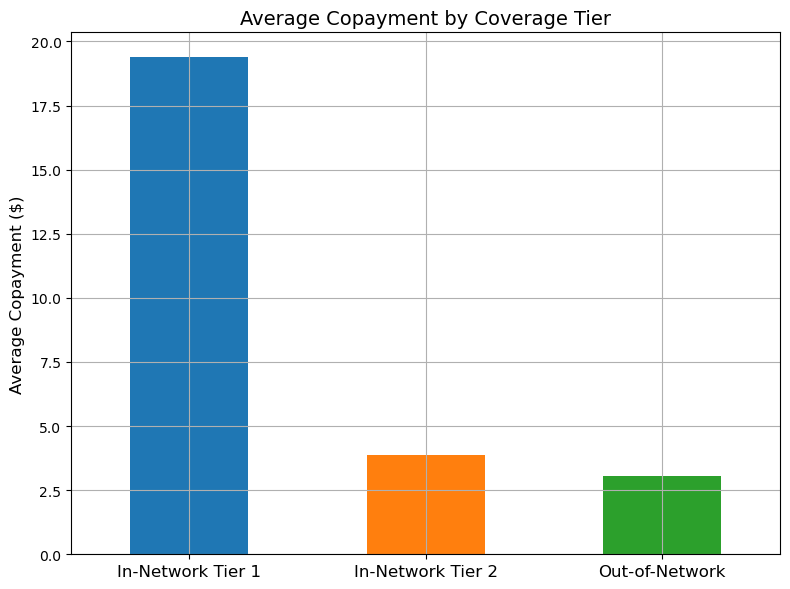

In [89]:
# 1. Cost-Sharing Structure Analysis: Summary statistics and box plot for copayment distribution


copay_tier_summary = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].describe()
print("Summary Statistics for Copayments by Tier:")
print(copay_tier_summary)

# Calculate the average copayments for each tier
average_copays = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].mean()

# Create a bar chart for average copayment amounts
plt.figure(figsize=(8, 6))
average_copays.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding title and labels
plt.title('Average Copayment by Coverage Tier', fontsize=14)
plt.ylabel('Average Copayment ($)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['In-Network Tier 1', 'In-Network Tier 2', 'Out-of-Network'], rotation=0, fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

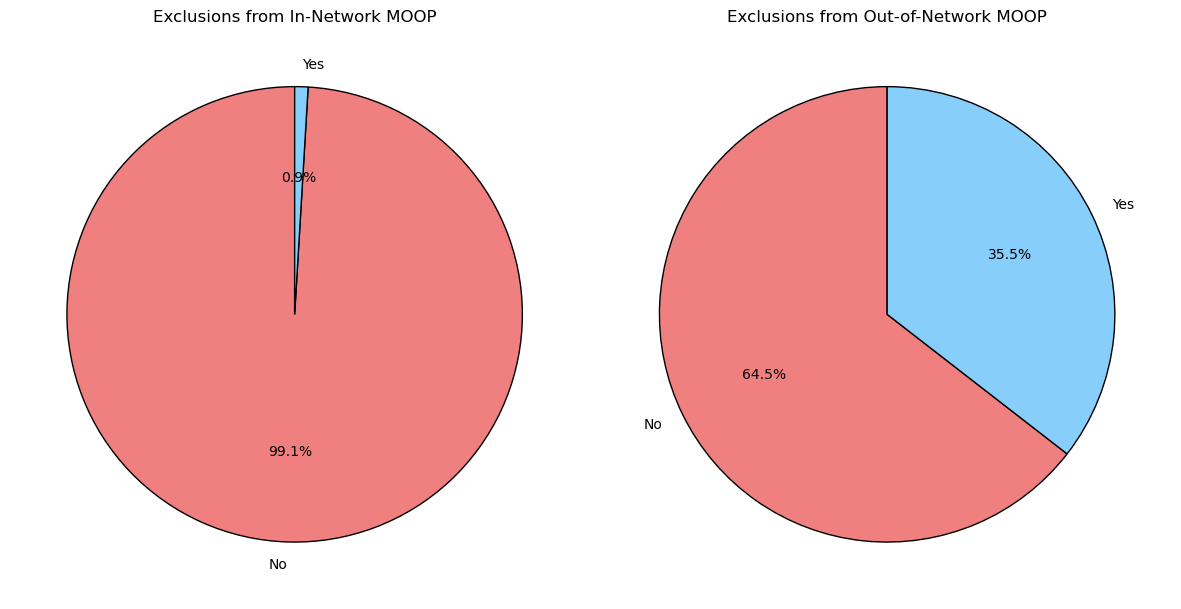

In [90]:

# 2. Exclusion Analysis for MOOP: Pie charts for MOOP exclusions


# Calculate the percentage of services excluded from MOOP (In-Network and Out-of-Network)
moop_exclusion_inn = df['IsExclFromInnMOOP'].value_counts(normalize=True) * 100
moop_exclusion_oon = df['IsExclFromOonMOOP'].value_counts(normalize=True) * 100

# Create a figure with two pie charts for In-Network and Out-of-Network MOOP exclusions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for In-Network MOOP exclusions
moop_exclusion_inn.plot(kind='pie', 
                        autopct='%1.1f%%',  # Display percentages with 1 decimal place
                        ax=axes[0], 
                        colors=['lightcoral', 'lightskyblue'],  # Colors for No and Yes
                        startangle=90,  # Start the pie chart from 90 degrees for consistency
                        labels=['No', 'Yes'],  # Add labels to the sections (No for included, Yes for excluded)
                        wedgeprops={'edgecolor': 'black'})  # Add black edge color to slices
axes[0].set_title('Exclusions from In-Network MOOP')  # Title for the In-Network chart
axes[0].set_ylabel('')  # No label needed for the y-axis (pie charts don’t need this)

# Plot for Out-of-Network MOOP exclusions
moop_exclusion_oon.plot(kind='pie', 
                        autopct='%1.1f%%',  # Display percentages with 1 decimal place
                        ax=axes[1], 
                        colors=['lightcoral', 'lightskyblue'],  # Same colors for consistency
                        startangle=90,  # Start the pie chart from 90 degrees
                        labels=['No', 'Yes'],  # Add labels to the sections (No for included, Yes for excluded)
                        wedgeprops={'edgecolor': 'black'})  # Add black edge color to slices
axes[1].set_title('Exclusions from Out-of-Network MOOP')  # Title for the Out-of-Network chart
axes[1].set_ylabel('')  # No label needed for the y-axis

# Adjust the layout to prevent overlap and display the pie charts clearly
plt.tight_layout()

# Show the figure with pie charts
plt.show()


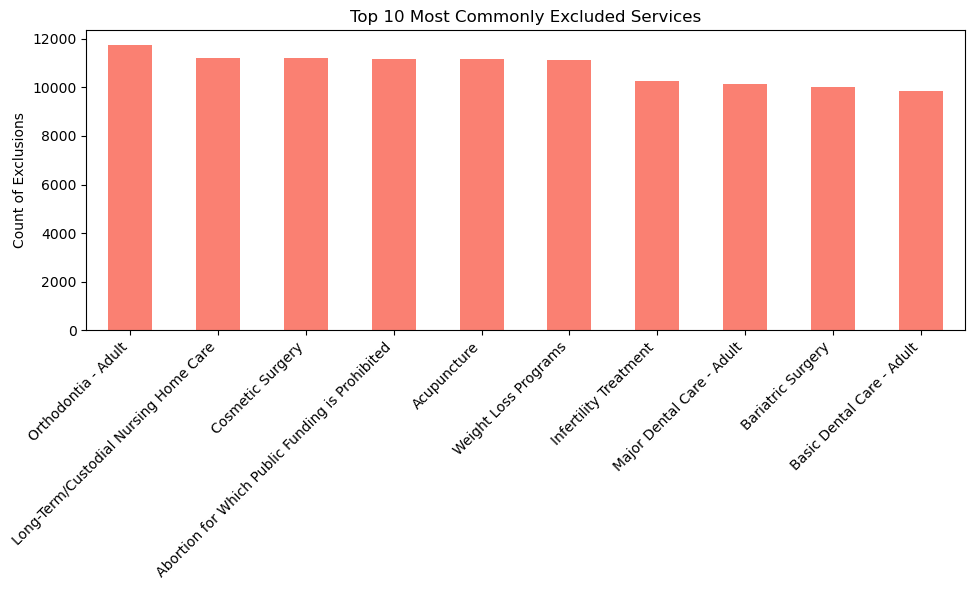

In [91]:

# 3. Service-Specific Coverage Patterns: Top 10 most excluded services

excluded_services = df[df['IsCovered'] == 'Not Covered']['BenefitName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
excluded_services.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Commonly Excluded Services')
plt.ylabel('Count of Exclusions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

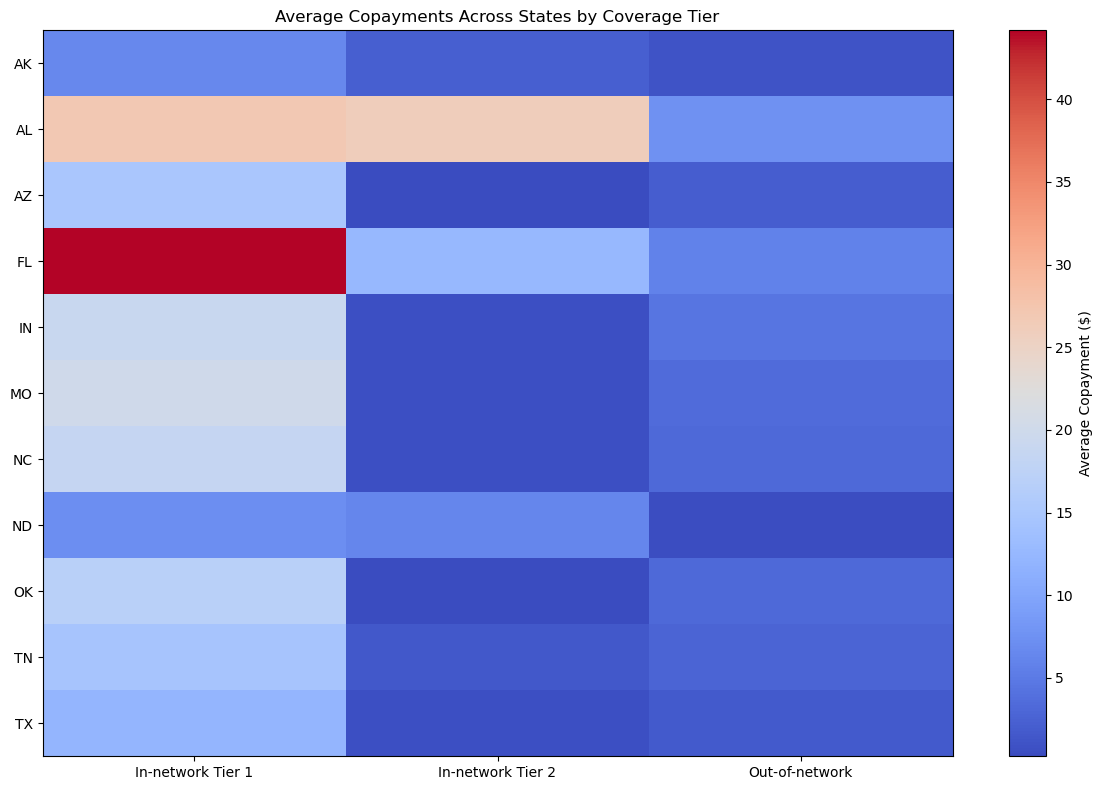

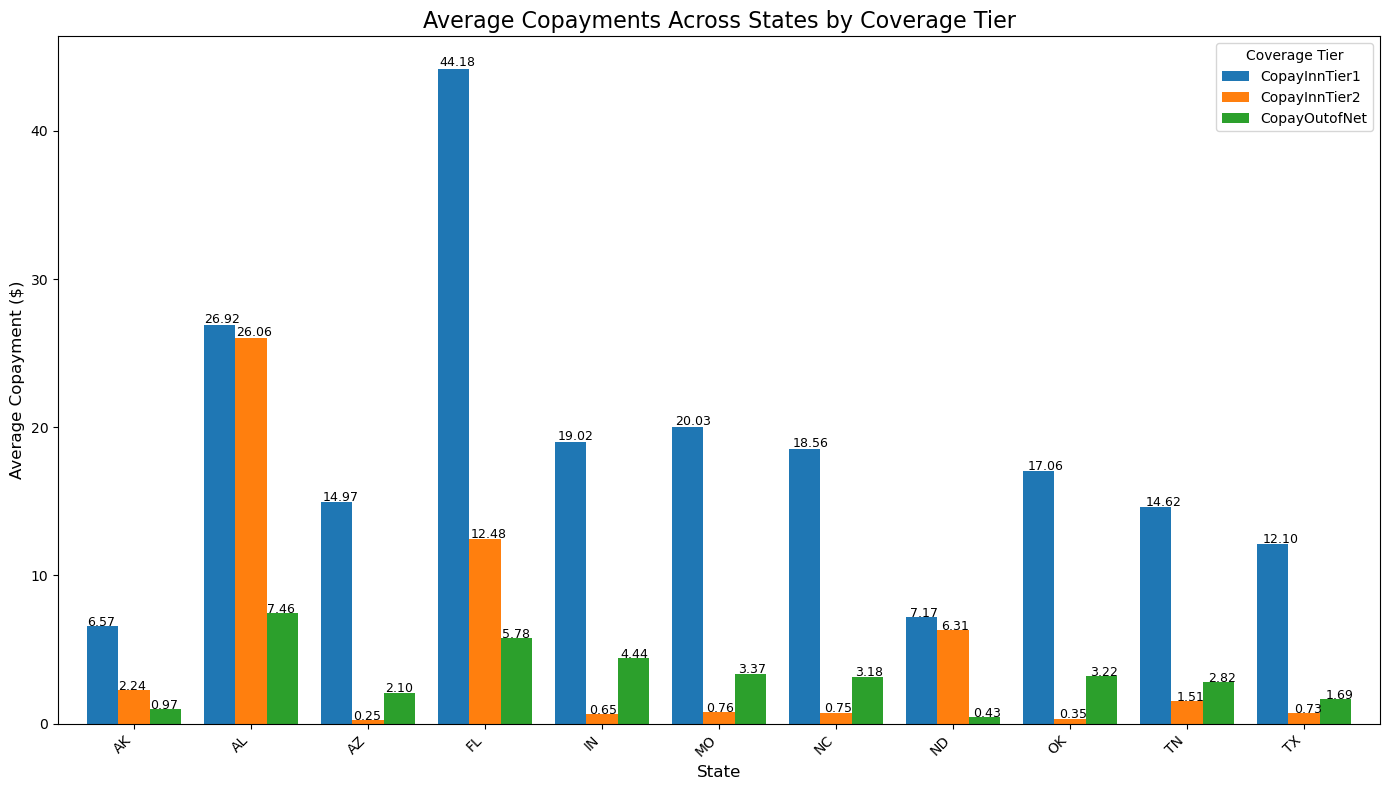

In [92]:
# 4. State-Based Plan Variability: Heatmap for copayments by state

state_copay_summary = df.groupby('StateCode')[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].mean().dropna()

plt.figure(figsize=(12, 8))
plt.imshow(state_copay_summary, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Average Copayment ($)')
plt.title('Average Copayments Across States by Coverage Tier')
plt.xticks(ticks=[0, 1, 2], labels=['In-network Tier 1', 'In-network Tier 2', 'Out-of-network'])
plt.yticks(ticks=range(state_copay_summary.shape[0]), labels=state_copay_summary.index)
plt.tight_layout()
plt.show()


# Plotting the grouped bar chart again with data labels for clarity
ax = state_copay_summary.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Copayments Across States by Coverage Tier', fontsize=16)
plt.ylabel('Average Copayment ($)', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coverage Tier', fontsize=10)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

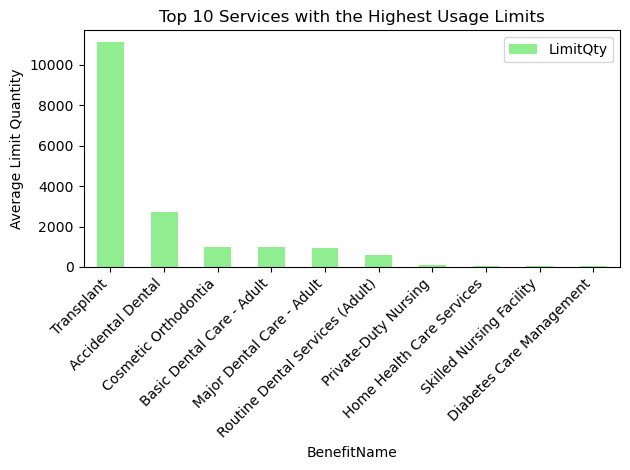

In [93]:
# 5. Limitations on Service Usage: Top 10 services with the highest usage limits

service_usage_limits = df.groupby('BenefitName')[['LimitQty']].mean().dropna().sort_values(by='LimitQty', ascending=False).head(10)

plt.figure(figsize=(10, 6))
service_usage_limits.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Services with the Highest Usage Limits')
plt.ylabel('Average Limit Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [94]:
## Machine Learning

In [95]:
#1. Clustering Insurance Plans Based on Cost-Sharing Structures

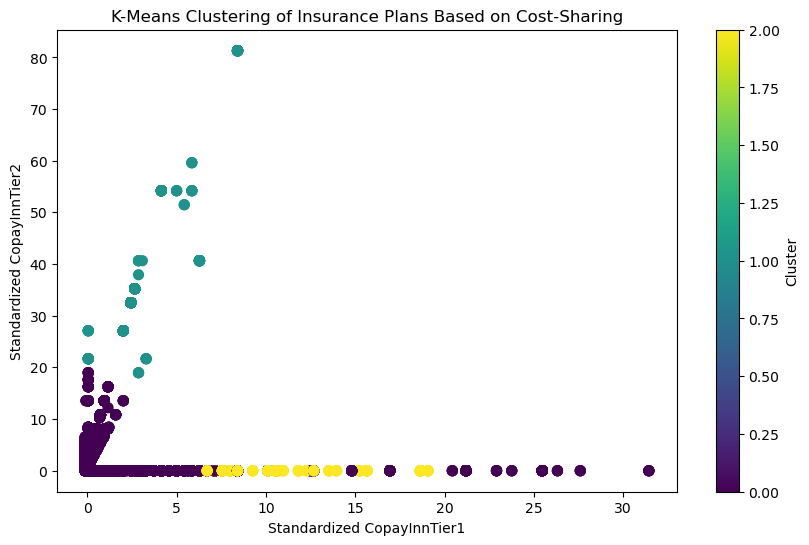

[[-1.56634939e-02 -1.96231972e-02 -3.18455128e-02]
 [ 3.20540252e+00  3.79864323e+01  6.45317525e-01]
 [ 1.18027990e+01 -3.80515924e-02  2.65586426e+01]]


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant cost-sharing columns for clustering
clustering_data = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].fillna(0)

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Implement K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualize the clusters (using the first two principal components for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Insurance Plans Based on Cost-Sharing')
plt.xlabel('Standardized CopayInnTier1')
plt.ylabel('Standardized CopayInnTier2')
plt.colorbar(label='Cluster')
plt.show()

# Check the cluster centers (to understand the characteristics of each cluster)
print(kmeans.cluster_centers_)


Overall Summary:
This K-Means clustering model successfully segments insurance plans into 3 distinct groups based on their copayments for in-network services:

Cluster 0 (purple) represents low-cost plans.
Cluster 1 (yellow) represents moderately priced plans, primarily affecting Tier 1.
Cluster 2 (teal) represents plans with higher copayments for both Tier 1 and Tier 2 services.
This kind of analysis helps in understanding the different types of insurance plans based on their cost-sharing structures, which is useful for consumers choosing plans or for insurers optimizing their offerings.

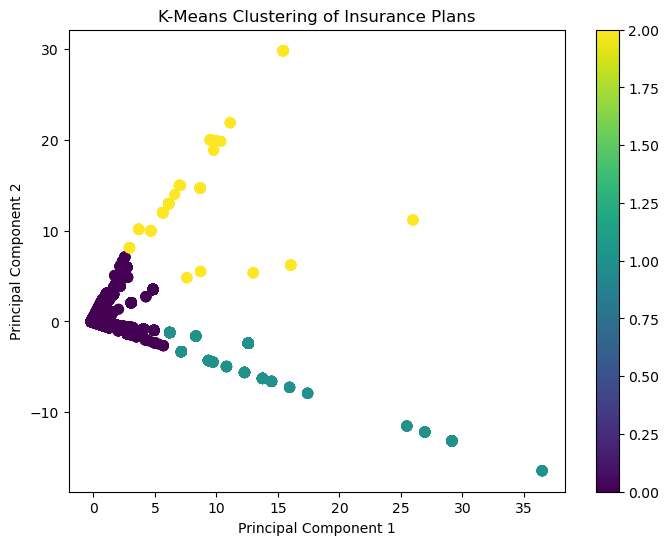

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Select features for clustering and drop rows with NaN values in selected columns
X = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Create a new DataFrame for the non-NaN rows and assign the clusters
df_non_na = df.loc[X.index].copy()
df_non_na['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering of Insurance Plans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Overall Summary:
This K-Means clustering model segments insurance plans into 3 distinct groups based on their copayments for in-network and out-of-network services:

Cluster 0 (purple): Represents plans with lower copayments and overall lower costs for services. These are likely more affordable for consumers.

Cluster 1 (yellow): Represents plans with moderate copayments, especially for in-network services. These plans offer a balance between cost and coverage.

Cluster 2 (teal): Represents plans with higher copayments for both in-network and out-of-network services, resulting in higher out-of-pocket costs for consumers.

In [98]:
#2.. Predictive Model for Out-of-Network Usage Costs

In [99]:
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayInnTier1',
       'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'LimitUnit', 'Exclusions', 'Explanation', 'EHBVarReason',
       'IsExclFromInnMOOP', 'IsExclFromOonMOOP', 'Cluster'],
      dtype='object')

Mean Squared Error: 962.1909475877294
R-Squared: 0.7560810237293784


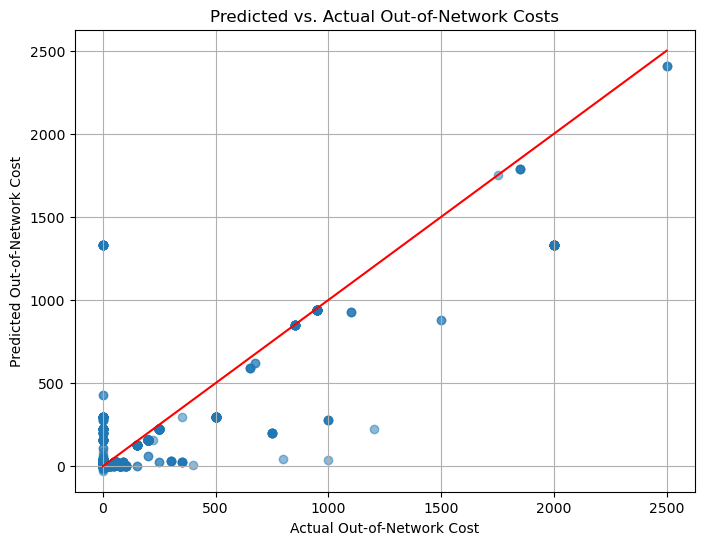

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_clean = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].dropna()

# Prepare X (features) and y (target)
X = df_clean[['CopayInnTier1', 'CopayInnTier2']]
y = df_clean['CopayOutofNet']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Optional: Plot predicted vs actual values to visualize the model's performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.title('Predicted vs. Actual Out-of-Network Costs')
plt.xlabel('Actual Out-of-Network Cost')
plt.ylabel('Predicted Out-of-Network Cost')
plt.grid(True)
plt.show()

Summary of Results:
R-Squared (0.756): The model explains 75.6% of the variance in out-of-network costs, which indicates a good fit.
Mean Squared Error (962.19): On average, the model’s predictions are off by about 962 units of cost.
Scatter Plot:
Points near (0, 0): Most predictions are accurate for lower cost values.
Outliers: The model struggles with higher out-of-network costs, as seen by the spread of points far from the red line.
The model performs well for lower costs but needs improvement for predicting higher costs. You could enhance the model by adding features or tuning parameters.

In [101]:
#3. Feature Importance and Model Interpretability in Coverage Decision

Accuracy: 0.7333075285465454
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     35137
           1       0.77      0.24      0.36     16533

    accuracy                           0.73     51670
   macro avg       0.75      0.60      0.60     51670
weighted avg       0.74      0.73      0.68     51670



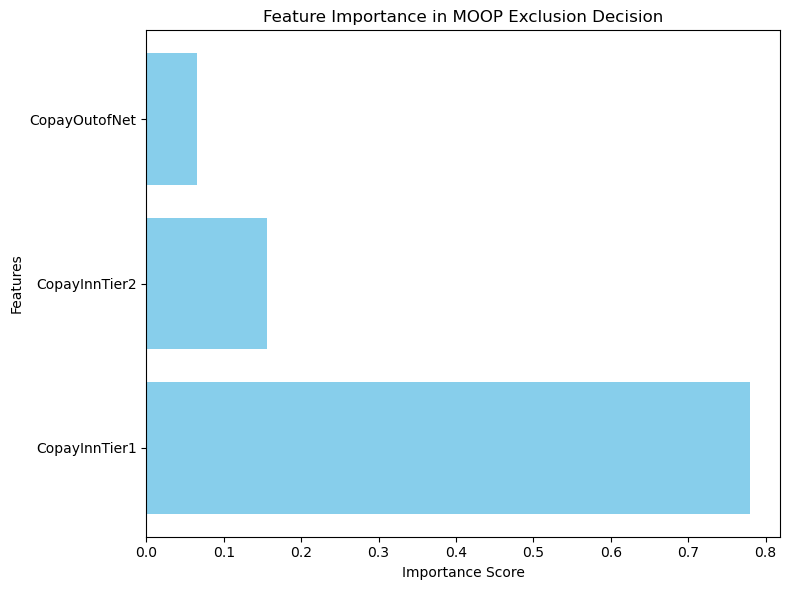

CopayInnTier1: 0.7795
CopayInnTier2: 0.1553
CopayOutofNet: 0.0652


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Prepare data for classification
# Drop rows where any of the selected features or target variable is NaN
data = df[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet', 'IsExclFromOonMOOP']].dropna()

# Extract features and target variable
X = data[['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']]
y = data['IsExclFromOonMOOP'].replace({'Yes': 1, 'No': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf_classifier.feature_importances_
features = ['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']

# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance in MOOP Exclusion Decision')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print the feature importance values
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance:.4f}')


Accuracy:

The model's overall accuracy is 73.33%, meaning that about 73% of the predictions (whether a service is excluded from MOOP or not) were correct.
Precision:

Precision for class 0 (services not excluded from MOOP) is 0.73, which means that when the model predicts a service is not excluded from MOOP, it is correct 73% of the time.
Precision for class 1 (services excluded from MOOP) is 0.77, indicating that the model is slightly better at correctly identifying excluded services (77% of predictions were correct).
Recall:

Recall for class 0 is 0.97, meaning the model identifies almost all services that should not be excluded from MOOP (97%).
Recall for class 1 is 0.24, which is relatively low, meaning the model struggles to correctly identify services that should be excluded from MOOP, as it only identifies 24% of them correctly.
F1-Score:

The F1-score balances precision and recall. For class 1 (excluded services), the F1-score is 0.36, showing that there is room for improvement, particularly in identifying excluded services.
The F1-score for class 0 (not excluded) is 0.83, indicating better performance in predicting non-excluded services.
Summary:

The model does well at predicting services that are not excluded from MOOP, but it struggles to predict services that are excluded. This is likely due to class imbalance, where non-excluded services are more frequent than excluded ones.


**feature engineering**
CopayInnTier1 (Copayment for In-Network Tier 1):

This feature has the highest importance, with a score of 0.7795. This indicates that the cost-sharing structure for in-network Tier 1 services plays the largest role in determining whether a service will be excluded from MOOP.
CopayInnTier2 (Copayment for In-Network Tier 2):

This feature has a lower importance score of 0.1553, meaning it is moderately important in the model’s predictions.
CopayOutofNet (Copayment for Out-of-Network):

This feature has the lowest importance score of 0.0652, indicating that the out-of-network copayments are less influential in determining whether a service is excluded from MOOP.
Summary:

The model heavily relies on CopayInnTier1 to make predictions. This suggests that services with higher in-network Tier 1 copayments are more likely to be excluded from MOOP.
CopayInnTier2 also has some influence, but not as much as Tier 1.
CopayOutofNet has minimal influence, which might indicate that out-of-network services have a smaller impact on MOOP exclusions in the data you're analyzing.